<a href="https://colab.research.google.com/github/arghya53/TimeSeriesAnalysis/blob/main/Time_Series_AutoArima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests
import datetime

mpl.rcParams['figure.figsize']= (10,8)
mpl.rcParams['axes.grid']=False

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv")
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [ ]:
import plotly.express as px

fig = px.line(df, x='timeStamp', y='demand', title= 'NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='3y', step='year', stepmode='backward'),
            dict(count=3, label='5y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
ny_df = df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

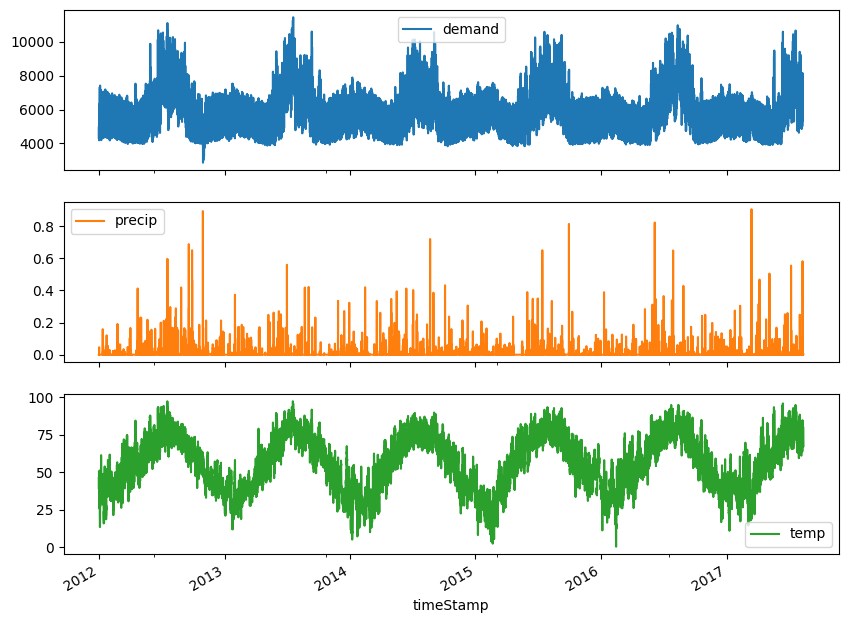

In [ ]:
ny_df.plot(subplots=True)

In [ ]:
df.isnull().any()

timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

In [ ]:
df.query('demand != demand') # As NaN are the objects, so they are not equal to the actual value of demand

,timeStamp,demand,precip,temp
49124,2012-03-11 02:00:00,NaN,0.0000,37.78
49125,2013-03-10 02:00:00,NaN,0.0000,38.18
49126,2014-03-09 02:00:00,NaN,0.0000,40.86
49127,2015-03-08 02:00:00,NaN,0.0000,36.96
49128,2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [ ]:
df.query('precip != precip')

,timeStamp,demand,precip,temp
31982,2015-08-25 19:00:00,9020.684,NaN,NaN
32550,2015-09-18 11:00:00,8219.750,NaN,NaN
33030,2015-10-08 13:00:00,6493.725,NaN,NaN
33293,2015-10-19 12:00:00,6234.450,NaN,NaN
33304,2015-10-19 23:00:00,5029.983,NaN,NaN
...,...,...,...,...
45052,2017-02-21 05:00:00,4550.708,NaN,NaN
45061,2017-02-21 14:00:00,6182.317,NaN,NaN
45066,2017-02-21 19:00:00,6280.158,NaN,NaN
48762,2017-07-26 04:00:00,4734.350,NaN,NaN


In [ ]:
df.query('temp != temp')

,timeStamp,demand,precip,temp
31982,2015-08-25 19:00:00,9020.684,NaN,NaN
32550,2015-09-18 11:00:00,8219.750,NaN,NaN
33030,2015-10-08 13:00:00,6493.725,NaN,NaN
33293,2015-10-19 12:00:00,6234.450,NaN,NaN
33304,2015-10-19 23:00:00,5029.983,NaN,NaN
...,...,...,...,...
45052,2017-02-21 05:00:00,4550.708,NaN,NaN
45061,2017-02-21 14:00:00,6182.317,NaN,NaN
45066,2017-02-21 19:00:00,6280.158,NaN,NaN
48762,2017-07-26 04:00:00,4734.350,NaN,NaN


In [ ]:
df['demand']=df['demand'].fillna(method= 'ffill')
df['temp']=df['temp'].fillna(method= 'ffill')

In [ ]:
df.isnull().any()

timeStamp    False
demand       False
precip        True
temp         False
dtype: bool

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

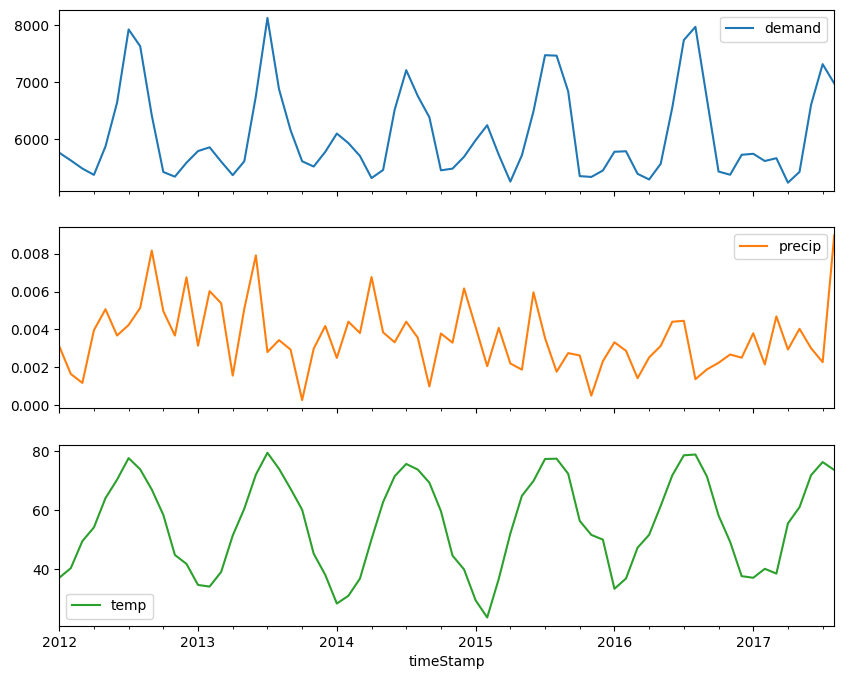

In [ ]:
ny_df.resample('M').mean().plot(subplots=True)

In [ ]:
ny_df_monthly = ny_df.resample('M').mean()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.6 MB/s eta 0:00:00


autoarima is like a grid search. It consists of 3 parameters.

---
P- it denotes order of the auto-regressive part. It denotes periods of lag in the data. It determines correlation of the current data point with the previous data point.

---


D- Number of non seasonal differences to make the curve stationary. If the data is non-stationary differences between previous two lags is to be calculated.

---
Q- moving average parameter. Number of lag forecast error in the prediction equation. We are taking the forecasting error and calculating the lag in the forecasting error.

---
AutoARIMA performs a gridsearch and tries various combination of p,d, and q parameters and selects a model based on the matrix that is given.


In [ ]:
import pmdarima as pm

model = pm.auto_arima(ny_df_monthly['demand'],
                      m= 12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test= 'adf', error_action = 'ignore',
                      suppress_warning = True, stepwise=True, trace=True)
# The purpose of this code is to determine the appropriate orders (p, d, q) for the ARIMA model and handle seasonality
# m=12 means there are 12 data points as we are calculating yearly data.
# max order of 4 p,d,and q
# start_p=0, start_q=0: These parameters set the range for starting values of the autoregressive (AR) and moving average (MA) orders.
# stepwise = True means randomsearch.
# The pm.auto_arima() function uses a stepwise approach and tests different combinations of AR, I (integration), and MA orders,
# along with seasonal orders, to select the best-fitting ARIMA model for the time series data. The ADF test is used to evaluate stationarity.

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1101.053, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1021.428, Time=0.41 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.859, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.502, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1025.222, Time=1.16 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1002.162, Time=1.07 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1000.202, Time=1.20 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(2,0,0)(1,0,2)[12] intercept   : AIC=993.083, Ti

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -489.588
Date:                                 Mon, 23 Oct 2023   AIC                            991.177
Time:                                         12:15:38   BIC                           1004.494
Sample:                                     01-31-2012   HQIC                           996.453
                                          - 08-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3681.4009    766.426      4.803      0.000    2179.234    5183.568
ar.L1          0.8623      0.120      7.188      0.000       0.627       1.097
ar.L2         -0.4707      0.138     -3.423      0.001      -0.740      -0.201
ma.S.L12       0.8895      0.134      6.658      0.000       0.628       1.151
ma.S.L24       0.4435      0.204      2.179      0.029       0.045       0.843
sigma2      8.822e+04   1.48e+04      5.964      0.000    5.92e+04    1.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 6.60
Prob(Q):                              0.80   Prob(JB):                         0.04
Heteroskedasticity (H):               0.70   Skew:                             0.55
Prob(H) (two-sided):                  0.41   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

There are 68 no. of obs

---
(2, 0, 0) represents the non-seasonal part of the SARIMA model. It means the model has an autoregressive (AR) order of 2 (p=2) and no differencing (d=0), and a moving average (MA) order of 0 (q=0).

---
(0, 0, [1, 2], 12) represents the seasonal part of the SARIMA model. It indicates that there is no seasonal autoregressive (SAR) component (P=0), no seasonal differencing (D=0), and two seasonal moving average (SMA) components at lags 1 and 2. The '12' indicates a seasonal period of 12 months, suggesting annual seasonality.




In [ ]:
ny_df_monthly

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.845491,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5232.217107,0.002942,55.621764
2017-05-31,5421.315935,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


In [ ]:
train = ny_df_monthly[(ny_df_monthly.index.get_level_values(0) >= '2012-01-31') &(ny_df_monthly.index.get_level_values(0) <= '2017-04-30')]
test = ny_df_monthly[(ny_df_monthly.index.get_level_values(0) > '2017-04-30')]

In [ ]:
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.315935,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7309.246677,0.002272,76.395270
2017-08-31,6971.501248,0.008961,73.730258


In [ ]:
model.fit(train['demand'])
# it has taken the best parameter (2,0,0)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [ ]:
forecast = model.predict(n_periods=4, return_conf_int=True)

In [ ]:
forecast

(2017-05-31    5322.118125
 2017-06-30    6205.604227
 2017-07-31    7187.965236
 2017-08-31    7302.377000
 Freq: M, dtype: float64,
 array([[4724.96266947, 5919.27358146],
        [5401.98231024, 7009.22614327],
        [6361.51381389, 8014.41665824],
        [6471.18872784, 8133.56527276]]))

In [ ]:
forecast_df = pd.DataFrame(forecast[0], index= test.index, columns=['Prediction'])

In [ ]:
forecast_df

,Prediction
timeStamp,
2017-05-31,5322.118125
2017-06-30,6205.604227
2017-07-31,7187.965236
2017-08-31,7302.377000


<Axes: xlabel='timeStamp'>

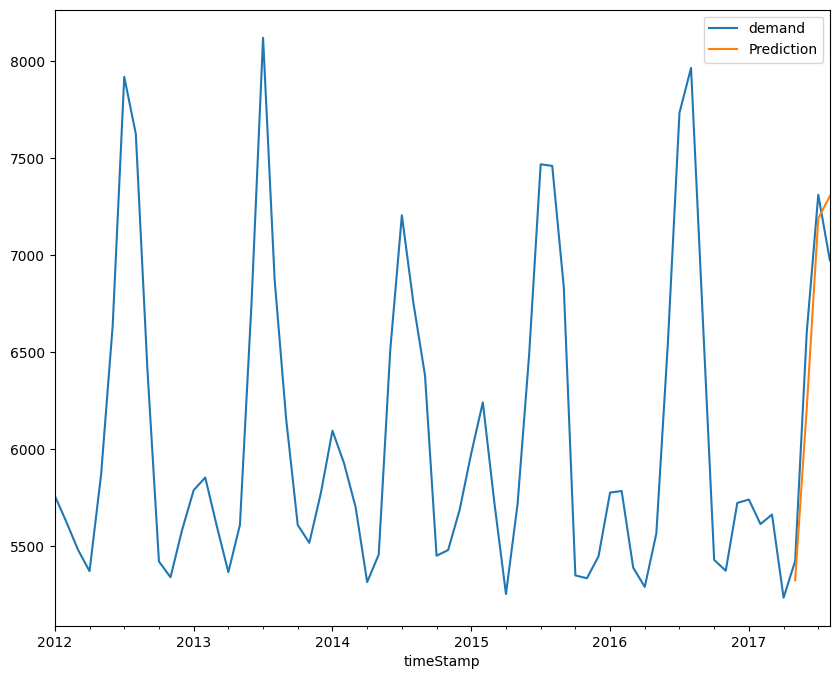

In [ ]:
pd.concat([ny_df_monthly['demand'], forecast_df], axis=1).plot()

In this position we are not sure whether the curve is moving downward(following the nature of the actual curve) or upward. So we need to predictive the values of some of the follwing samples.

In [ ]:
forecast1 = model.predict(n_periods=8, return_conf_int=True)

In [ ]:
forecast1

(2017-05-31    5322.118125
 2017-06-30    6205.604227
 2017-07-31    7187.965236
 2017-08-31    7302.377000
 2017-09-30    6403.371092
 2017-10-31    5790.200578
 2017-11-30    5692.749548
 2017-12-31    5950.520158
 Freq: M, dtype: float64,
 array([[4724.96266947, 5919.27358146],
        [5401.98231024, 7009.22614327],
        [6361.51381389, 8014.41665824],
        [6471.18872784, 8133.56527276],
        [5554.18568347, 7252.55650028],
        [4933.47955656, 6646.92159933],
        [4835.8869217 , 6549.61217341],
        [5092.9787411 , 6808.06157493]]))

In [ ]:
forecast_range = pd.date_range(start= '2017-08-31', periods=8, freq='M' ) # from the mentioned date create 8 periods with monthly frequency

In [ ]:
forecast1_df = pd.DataFrame(forecast1[0], index=forecast_range, columns=['Prediction'])
# creating a pd dataframe

In [ ]:
forecast1_df

,Prediction
2017-08-31,7302.377000
2017-09-30,6403.371092
2017-10-31,5790.200578
2017-11-30,5692.749548
2017-12-31,5950.520158
2018-01-31,NaN
2018-02-28,NaN
2018-03-31,NaN


<Axes: >

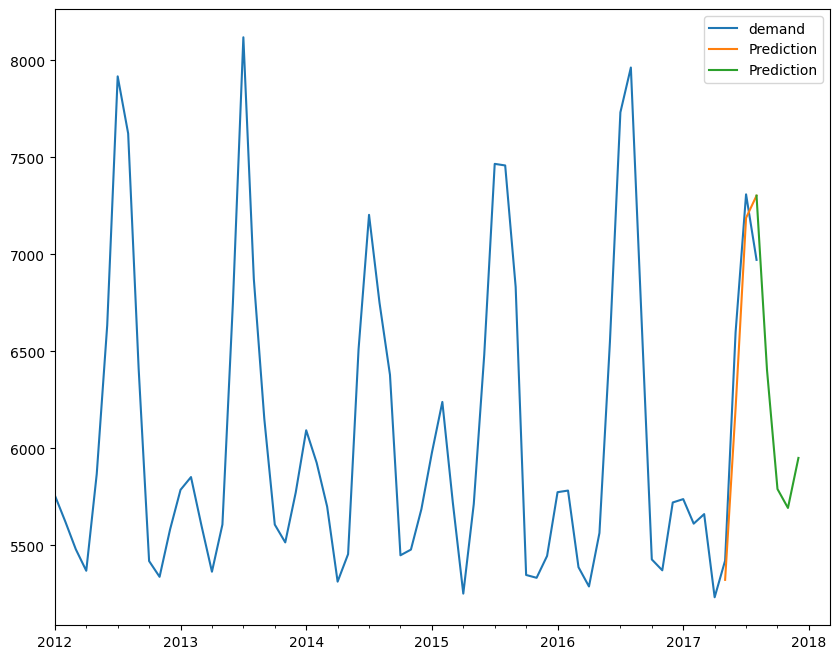

In [ ]:
pd.concat([ny_df_monthly['demand'], forecast_df, forecast1_df], axis=1).plot()

In [ ]:
lower = pd.Series(forecast1[1][:, 0], index = forecast_range)
upper = pd.Series(forecast1[1][:, 1], index= forecast_range)

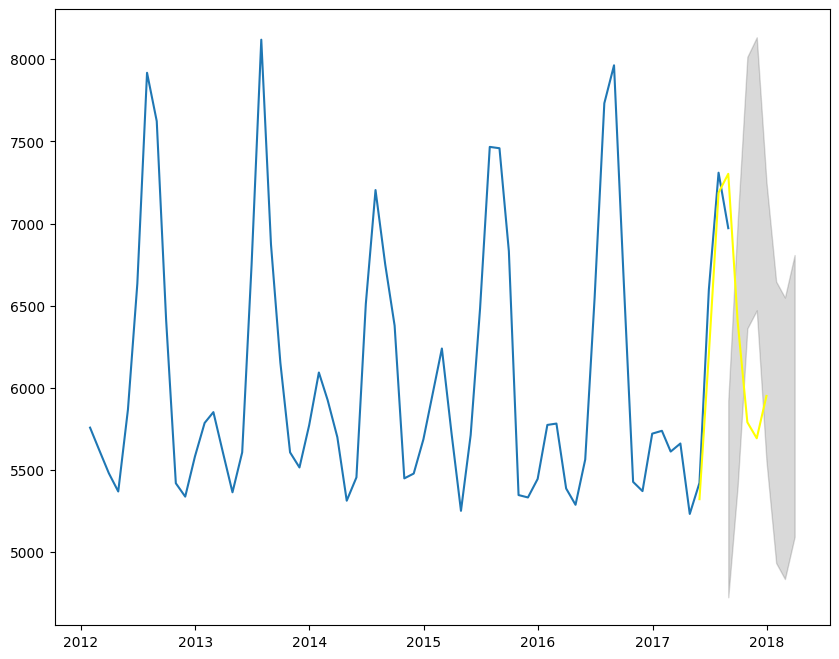

In [ ]:
plt.plot(ny_df_monthly['demand'])
plt.plot(pd.concat([forecast_df, forecast1_df]), color='yellow')
plt.fill_between(forecast_range,
                 lower,
                 upper,
                 color='k', alpha= 0.15)

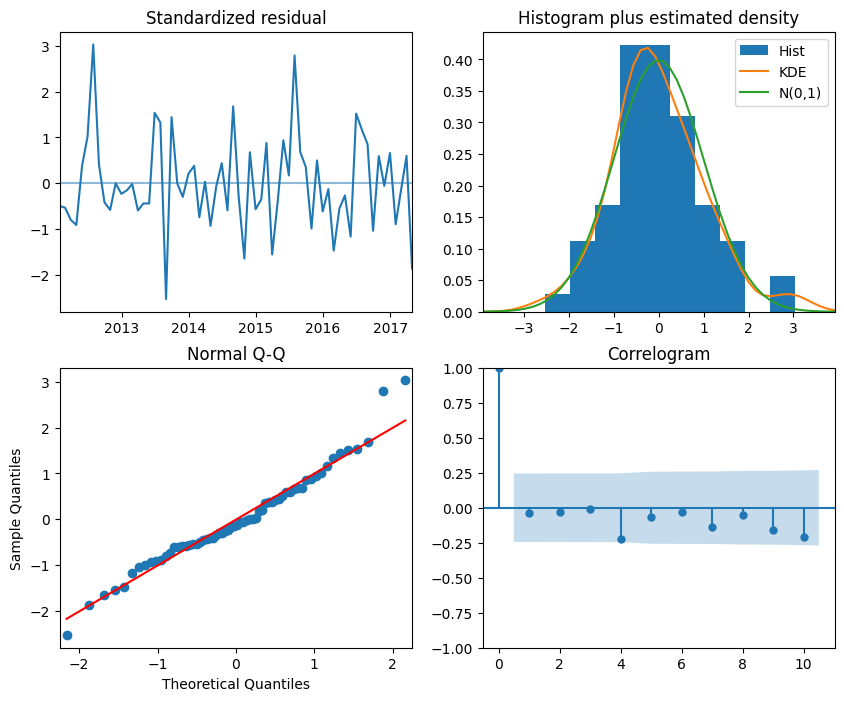

In [ ]:
out = model.plot_diagnostics()